In [1]:
import pandas as pd
chewy_df=pd.read_csv('chewy_review.csv')

In [4]:
#Keep only 4 columns: brand name, average score per year (2009-2019), year
newchewy=chewy_df[['brandName','date','productName', 'reviewRating']].copy()


In [5]:
#Add column "year"
newchewy['year']=newchewy.date.map(lambda x: int(x[:4]))

In [8]:
newchewyGroup=newchewy.groupby(['brandName','year']).mean()
newchewyGroup=newchewyGroup.reset_index()


In [9]:
#Filter by the top 10 brands with the most product availability found by the previous analysis
Top10Brand=['Blue Buffalo', 'Wellness', "Royal Canin", "Merrick", "Cesar", "Purina Pro Plan", "Instinct", "Hill's Prescription Diet", "Royal Canin Veterinary Diet","Hill's Science Diet"]
Top10BrandGroup=newchewyGroup[newchewyGroup['brandName'].isin(Top10Brand)]
Top10BrandGroup=Top10BrandGroup[Top10BrandGroup.year>2015]
Top10BrandGroup['Year']=Top10BrandGroup.year.map(lambda x: str(x))


Text(0.5, 1.0, 'Brand Review Score Trend')

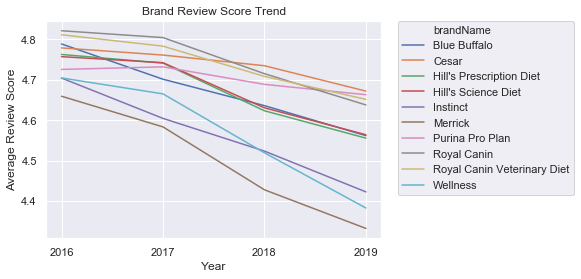

In [11]:
#Make graph with Seaborn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


trend=sns.lineplot(x="Year", y="reviewRating", hue="brandName", data=Top10BrandGroup)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Average Review Score')
plt.title('Brand Review Score Trend')

In [23]:
#make graph with plotly
import plotly.express as px
%matplotlib inline

fig = px.line(Top10BrandGroup, x='Year', y='reviewRating', color='brandName', title='Brand Review Score Trend for 10 Brands with High Availability')
fig.update_layout(autosize=False, width=700, height=400)
fig.show()

In [35]:
#Find brands with increasing trend
from scipy.stats import linregress
Regress=newchewyGroup.groupby('brandName').apply (lambda v: linregress(v.year, v.reviewRating)[0])
Regress=Regress.sort_values(ascending=False)
PositiveRegress=Regress[Regress>0]
PositiveRegress

brandName
HI-TOR           0.387124
Liver Bits       0.173333
Forza10          0.160000
Hound & Gatos    0.101204
KASIKS           0.078510
Wild Frontier    0.057785
PetGuard         0.027571
Purina Bella     0.026674
Full Moon        0.020068
NRG              0.016529
K9 Natural       0.015657
Inukshuk         0.009868
dtype: float64

In [41]:
#Prepare data for visualization
PositiveRegress_Ls=PositiveRegress.index.tolist()
PositiveIncrBrandGroup=newchewyGroup[newchewyGroup['brandName'].isin(PositiveRegress_Ls)]
PositiveIncrBrandGroup=PositiveIncrBrandGroup[PositiveIncrBrandGroup.year>2015]
PositiveIncrBrandGroup['Year']=PositiveIncrBrandGroup.year.map(lambda x: str(x))

Text(0.5, 1.0, 'Brand Review Score Trend')

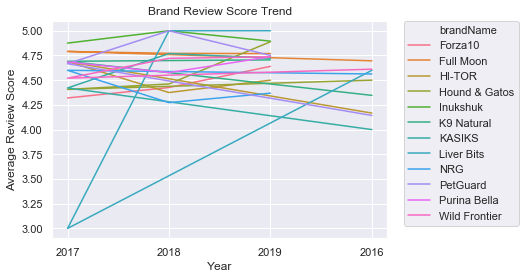

In [43]:
#make graph with seaborn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


trend=sns.lineplot(x="Year", y="reviewRating", hue="brandName", data=PositiveIncrBrandGroup)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Average Review Score')
plt.title('Brand Review Score Trend')

In [44]:
#make graph with plotly
import plotly.express as px
%matplotlib inline

fig = px.line(PositiveIncrBrandGroup, x='Year', y='reviewRating', color='brandName', title='Brands with Increasing Average Review Score 2016-2019')
fig.update_layout(autosize=False, width=700, height=500)
fig.show()